In [35]:
# importing load_dotenv
from dotenv import load_dotenv
# importing operating system
import os
# makes file acessable
load_dotenv()
# importing requests
import requests
# importing pandas
import pandas as pd
# importing alpaca trade api
import alpaca_trade_api as trade_api
# importing datetime
from datetime import datetime
# importing plotlib
%matplotlib inline

In [29]:
# defining a dataframe with apple shares and msft shares
stock_amounts = {'Shares':[300,200]}
df_shares = pd.DataFrame(stock_amounts, index =['AAPL','MSFT'])

In [30]:
df_shares

,Shares
AAPL,300
MSFT,200


In [31]:
! cat .env

ALPACA_API_KEY = PKCWCBDJ1NFVEXLL7NVN
ALPACA_SECRET_KEY = Q6bqj5diyLfYkkW8tpoK1qulFF3fomey3lT2wp8T
QUANDL_API_KEY = JZhwyhfzkAVEai6d5evD

In [36]:
# Load .env environment variables
load_dotenv() 

True

In [37]:
# Retrieve API key and store as Python variable
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
python_variables = [alpaca_api_key,alpaca_secret_key]

In [41]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-23", tz="America/New_York").isoformat()

In [43]:
# defining the needed tickers
tickers = ['AAPL','MSFT']

In [52]:
# alpaca=trade_api.REST(python_variables[0], python_variables[1], api_version='v2')

In [53]:
from alpaca_trade_api.rest import REST, TimeFrame
stocks = REST(python_variables[0], python_variables[1])

In [101]:
stock_price = alpaca.get_bars(tickers, TimeFrame.Day, "2022-03-22", "2022-03-22", adjustment='raw').df
stock_price

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-22 04:00:00+00:00,165.48,169.42,164.91,168.82,80725419,627274,168.223301,AAPL
2022-03-22 04:00:00+00:00,299.55,305.00,298.77,304.06,27303945,395640,303.127898,MSFT


In [100]:
stock_price = stock_price[['close','symbol']]

KeyError: "['symbol'] not in index"

In [90]:
stock_price=stock_price[['close']]

In [89]:
# Fetch the current closing prices from the DataFrame
msft_price = float(stock_price.loc['MSFT','close'])
aapl_price = float(stock_price.loc['AAPL','close'])

In [92]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * df_shares.loc["MSFT"]["Shares"]
aapl_value = aapl_price * df_shares.loc["AAPL"]["Shares"]

In [94]:
# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['MSFT']['Shares']} MSFT shares is ${msft_value:0.2f}")
print(f"The current value of the {df_shares.loc['AAPL']['Shares']} AAPL shares is ${aapl_value:0.2f}")

The current value of the 200 MSFT shares is $60812.00
The current value of the 300 AAPL shares is $50646.00


In [95]:
# Add column `value` to `df_shares` to show current values of stocks
df_shares['values']=[aapl_value,msft_value,]
df_shares

,Shares,values
AAPL,300,50646.0
MSFT,200,60812.0


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='Shares'>

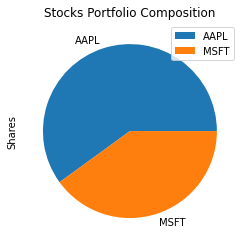

In [97]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="Shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Stock Portfolio'}>

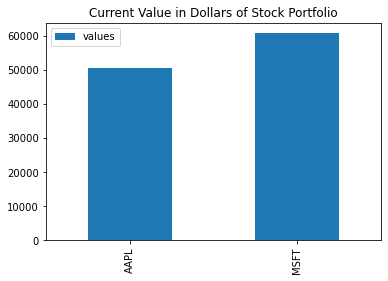

In [98]:
# Create a bar plot to show the value of shares
df_shares.plot.bar(y="values", title="Current Value in Dollars of Stock Portfolio")